# ITS307 Data Analytics                                                   : Spring Semester 2022
# Lecture 18- Exercise
# Unsupervised Learning : K-Mean Clustering

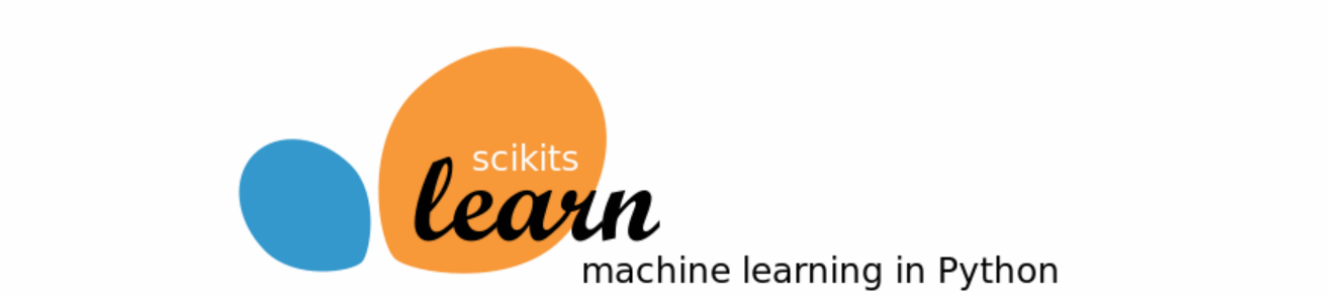

# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets

# 1. Data Manipulation with pandas

In [2]:
iris = datasets.load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [3]:
df = pd.DataFrame(data = iris.data, columns=iris.feature_names)
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [4]:
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [5]:
df.drop(['sepal length (cm)','sepal width (cm)'],inplace=True,axis=1)
df.head()

petal length (cm)  petal width (cm)
0                1.4               0.2
1                1.4               0.2
2                1.3               0.2
3                1.5               0.2
4                1.4               0.2

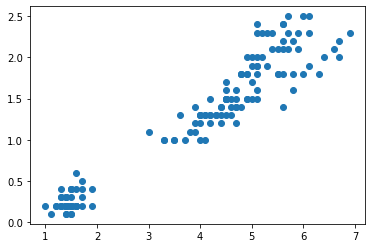

In [6]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])

# 4. Training Model

In [7]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=3)

In [8]:
kmean.fit(df)

KMeans(n_clusters=3)

In [9]:
kmean.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
df['cluster'] = kmean.labels_
df.head()

petal length (cm)  petal width (cm)  cluster
0                1.4               0.2        1
1                1.4               0.2        1
2                1.3               0.2        1
3                1.5               0.2        1
4                1.4               0.2        1

In [11]:
data = [[1.4,0.2]]
kmean.predict(data)

array([1])

In [12]:
cluster0 = df[df.cluster == 0]

In [13]:
cluster1= df[df.cluster == 1]

In [14]:
cluster2 = df[df.cluster == 2]

In [15]:
centroid0 = kmean.cluster_centers_[1:3]
centroid0

array([[1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

In [17]:
centroiddf = pd.DataFrame(data=kmean.cluster_centers_,columns=['x','y'])

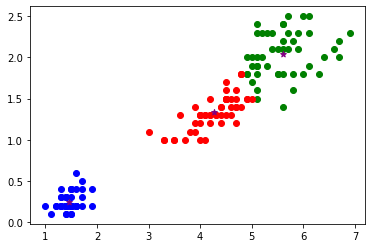

In [18]:
plt.scatter(cluster0['petal length (cm)'],cluster0['petal width (cm)'],color='green')
plt.scatter(cluster1['petal length (cm)'],cluster1['petal width (cm)'],color='blue')
plt.scatter(cluster2['petal length (cm)'],cluster2['petal width (cm)'],color='red')
plt.scatter(centroiddf.x,centroiddf.y,color='purple',marker='*',label='centroid')

In [19]:
kmean.cluster_centers_

array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

In [20]:
centroiddf

x         y
0  5.595833  2.037500
1  1.462000  0.246000
2  4.269231  1.342308

In [21]:
K = np.arange(1,10)
sse = []
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(df.drop('cluster',axis=1))
    sse.append(km.inertia_)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [22]:
sse

[550.8953333333333,
 86.39021984551391,
 31.371358974358966,
 19.48300089968511,
 14.077321759259267,
 11.057257664362925,
 9.185075914423738,
 7.667019523446292,
 6.5415844614322864]

In [23]:
plt.plot(K,sse)

In [29]:
from sklearn.metrics import silhouette_score
sil_scores = []
K = np.arange(2,11)
for k in K:
    km = KMeans(n_clusters = k)
    km.fit(df.drop('cluster',axis=1))
    sil_scores.append(silhouette_score(df.drop('cluster',axis=1),km.labels_,metric='euclidean'))
    


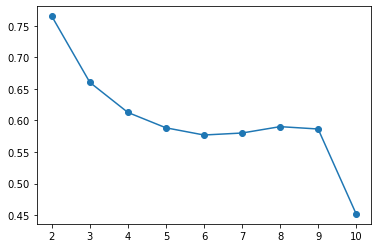

In [32]:
plt.plot(K,sil_scores,'-o')